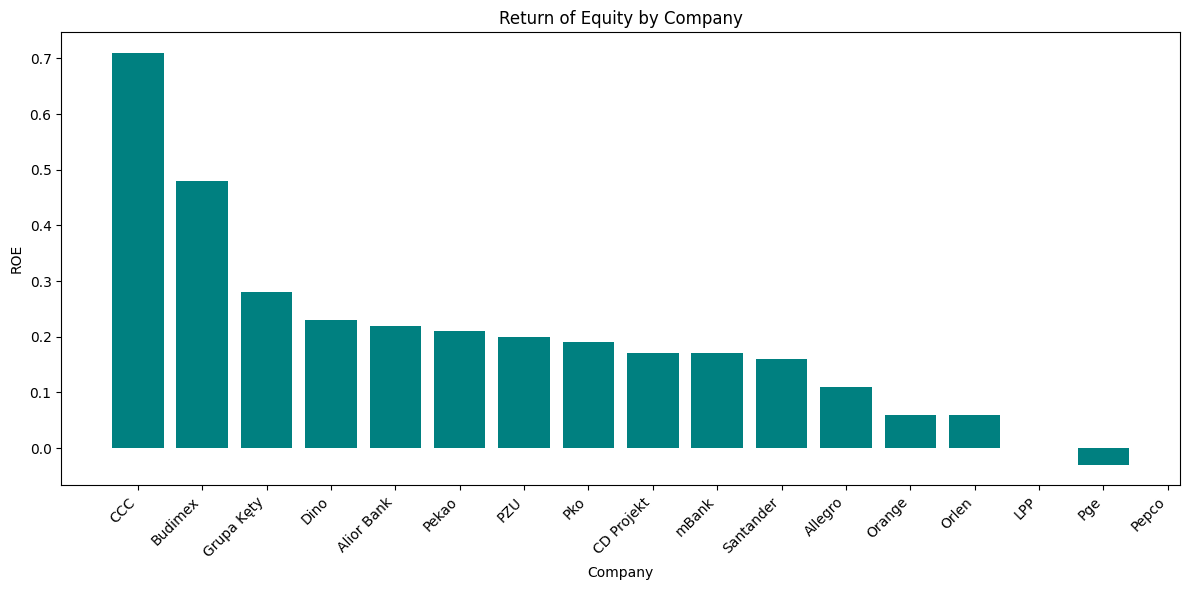

In [14]:
#Return of Equity by Company using plt // Zwrot kapitału własnego według spółki
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df_sorted = df.sort_values(by='ROE_reported', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(df_sorted['Company'], df_sorted['ROE_reported'], color='teal')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Company')
plt.ylabel('ROE')
plt.title('Return of Equity by Company')
plt.tight_layout()
plt.show()


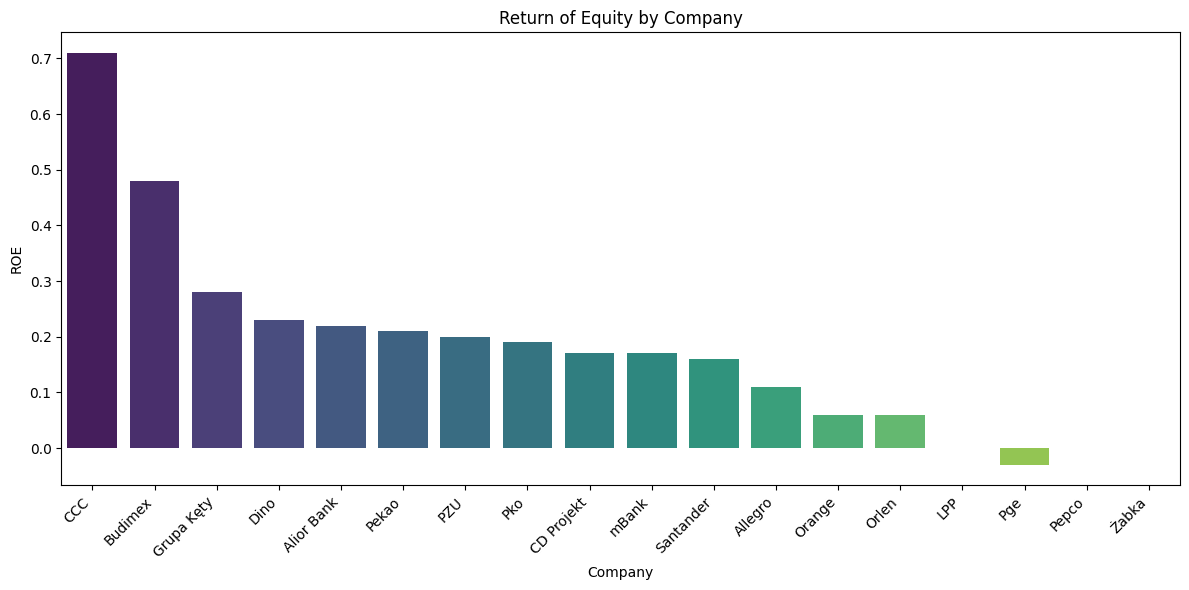

In [39]:
#Return of Equity by Company using seaborn // zwrot kapitału własnego
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df_sorted = df.sort_values(by='ROE_reported', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Company', y='ROE_reported', data=df_sorted, hue='Company', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Company')
plt.ylabel('ROE')
plt.title('Return of Equity by Company')
plt.tight_layout()
plt.show()

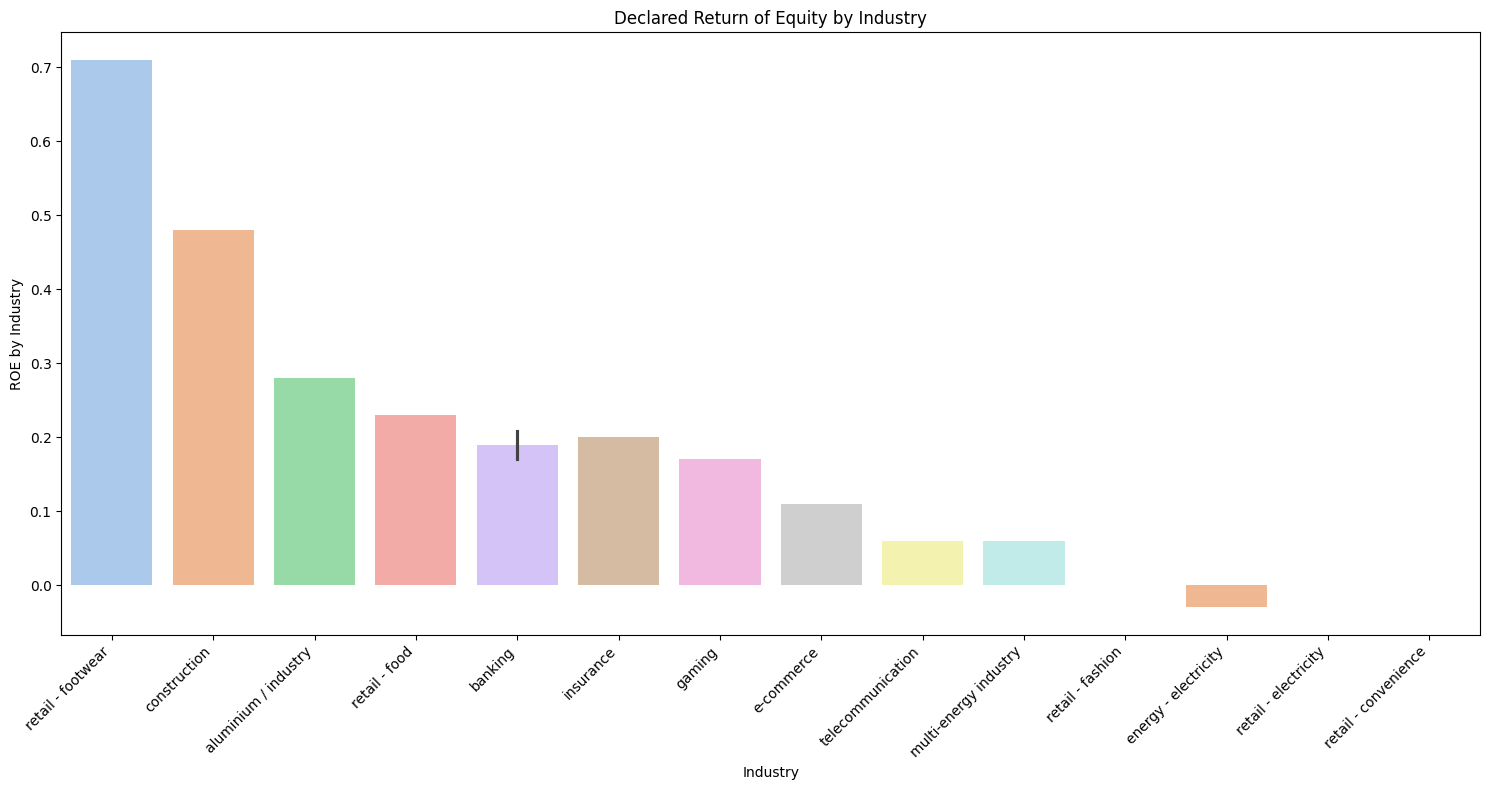

In [41]:
#Average Return of Equity by Industry // Średnia stopa zwrotu z kapitału własnego według branży
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv('all_companies_wide_with_ratios.csv')

df_grouped = df.groupby('Industry', as_index=False)['ROE_reported'].mean()
df_sorted = df.sort_values(by="ROE_reported", ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x="Industry", y="ROE_reported", data=df_sorted, hue="Industry",  palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry')
plt.ylabel('ROE by Industry')
plt.title('Declared Return of Equity by Industry')
plt.tight_layout()
plt.show()

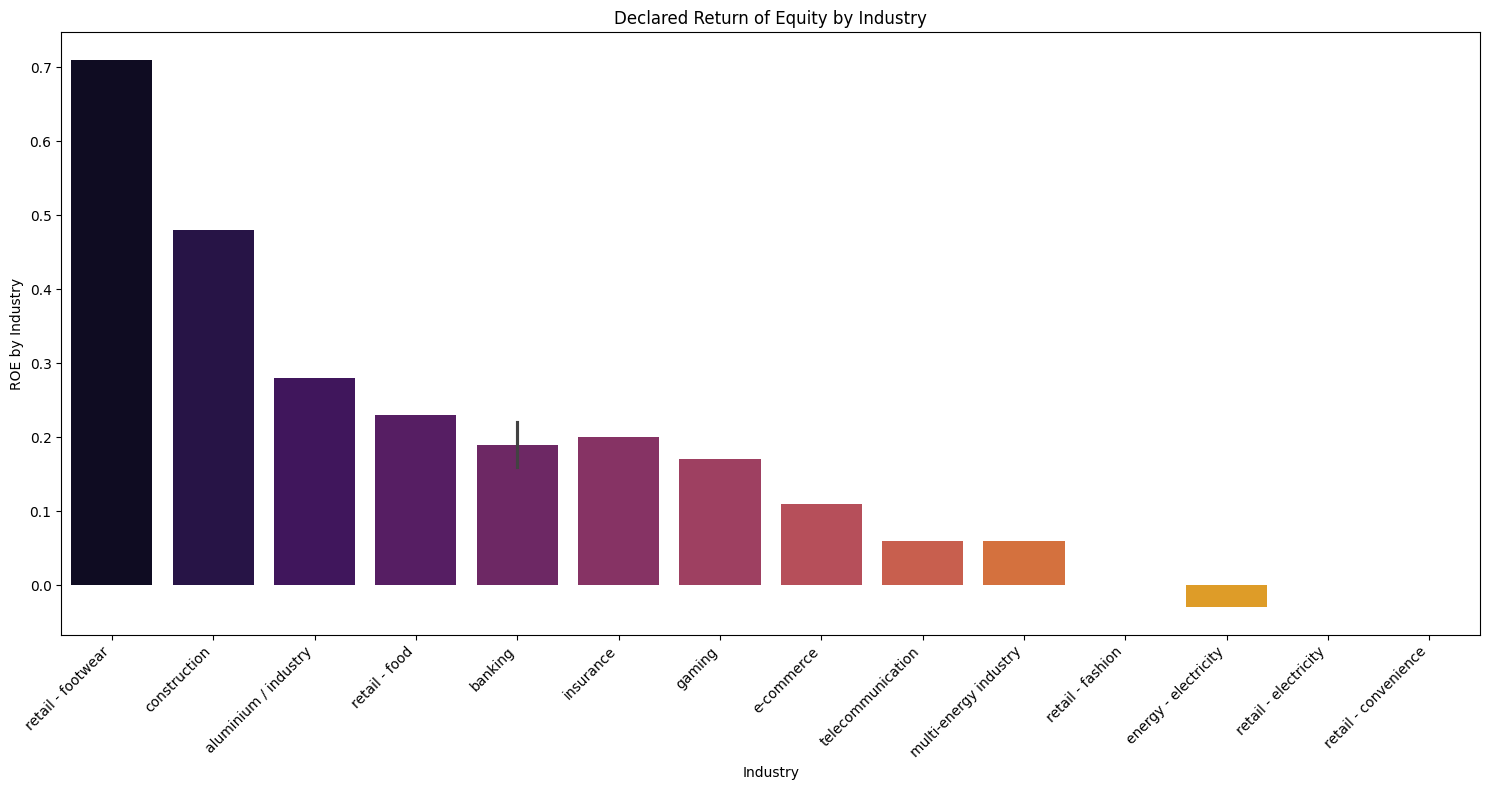

In [44]:
#Median ROE per Industry // Mediana zwrotu z kapitału własnego według branży
import seaborn as sns
import numpy as np
from numpy import median
import matplotlib.pyplot as plt

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df_sorted=df.sort_values(by='ROE_reported', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x="Industry", y="ROE_reported", data=df_sorted, estimator=median, hue="Industry", palette='inferno')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry')
plt.ylabel('ROE by Industry')
plt.title('Declared Return of Equity by Industry')
plt.tight_layout() 
plt.show()


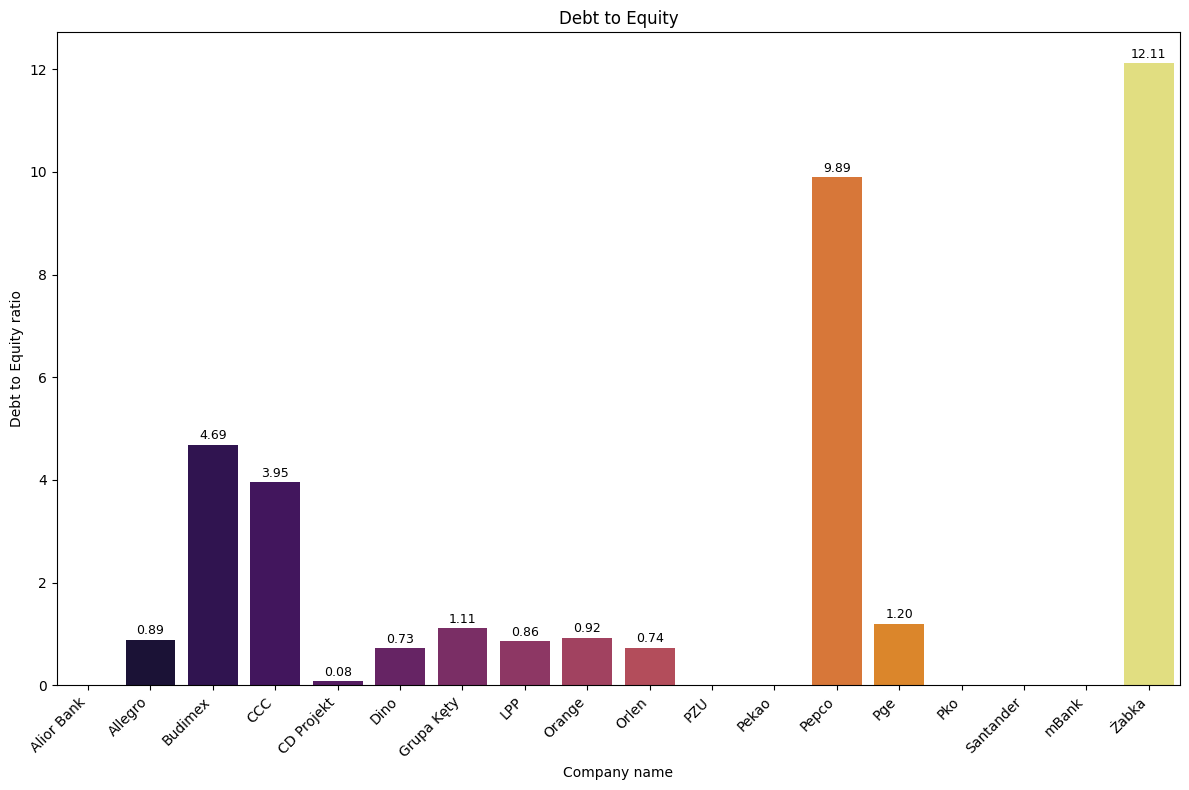

In [15]:
#Debt to Equity Ratio // Zadłużenie firm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df_sorted = df.sort_values(by="Company", ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Company", y="Debt_to_Equity_Q1_2025", data=df, hue="Company", palette="inferno")
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.text(p.get_x() + p.get_width()/2, height + 0.05, f'{height:.2f}', 
                ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha="right")
plt.xlabel('Company name')
plt.ylabel('Debt to Equity ratio')
plt.title("Debt to Equity")
plt.tight_layout()
plt.show()

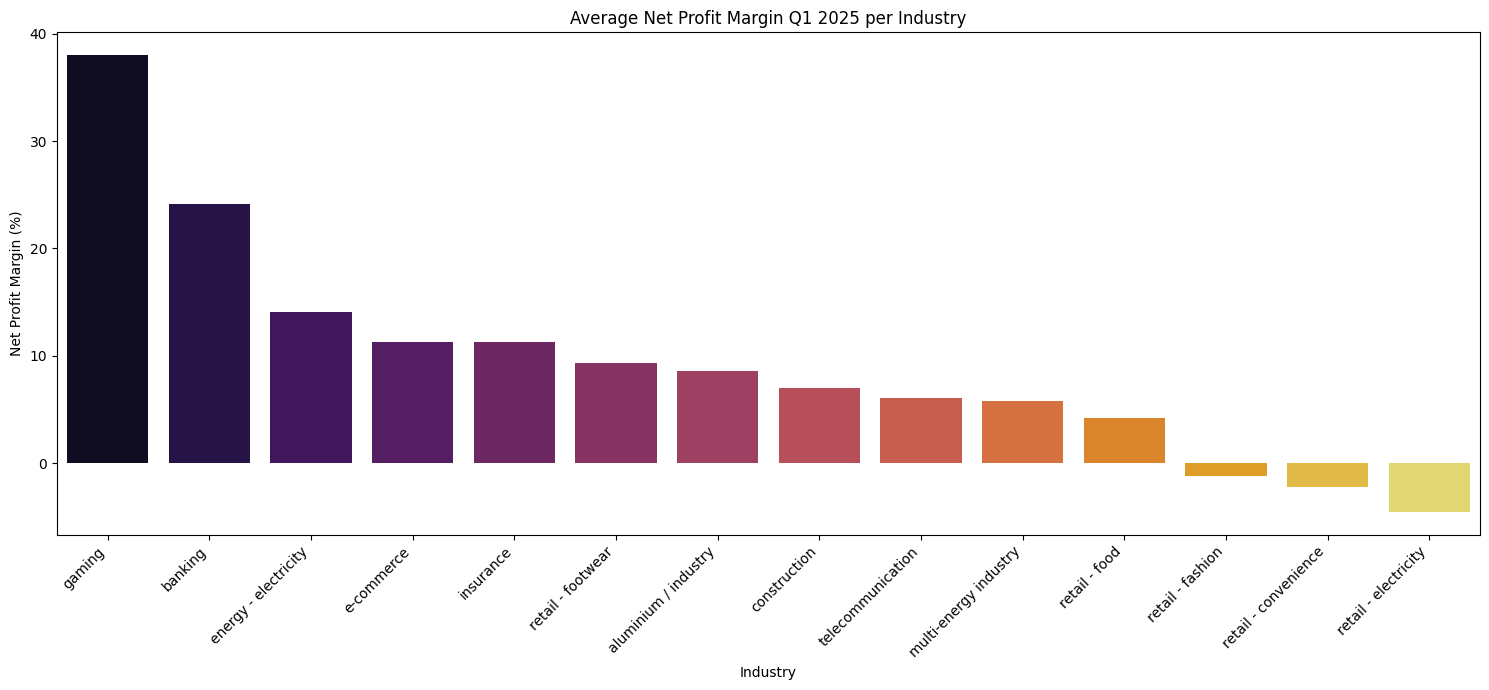

In [36]:
#Average Net Profit Margin Q1 2025 per Industry // Średnia marża zysku netto w I kw. 2025 r. według branży 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Net_Profit_Margin'] = df['Net_Profit'] / df['Revenue']*100
industry_margin = df.groupby('Industry')['Net_Profit_Margin'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,7))
sns.barplot(x='Industry', y='Net_Profit_Margin', data=industry_margin, hue='Industry' , palette='inferno')
plt.xticks(rotation=45, ha='right')
plt.title('Average Net Profit Margin Q1 2025 per Industry')
plt.xlabel('Industry')
plt.ylabel('Net Profit Margin (%)')
plt.tight_layout()
plt.show()


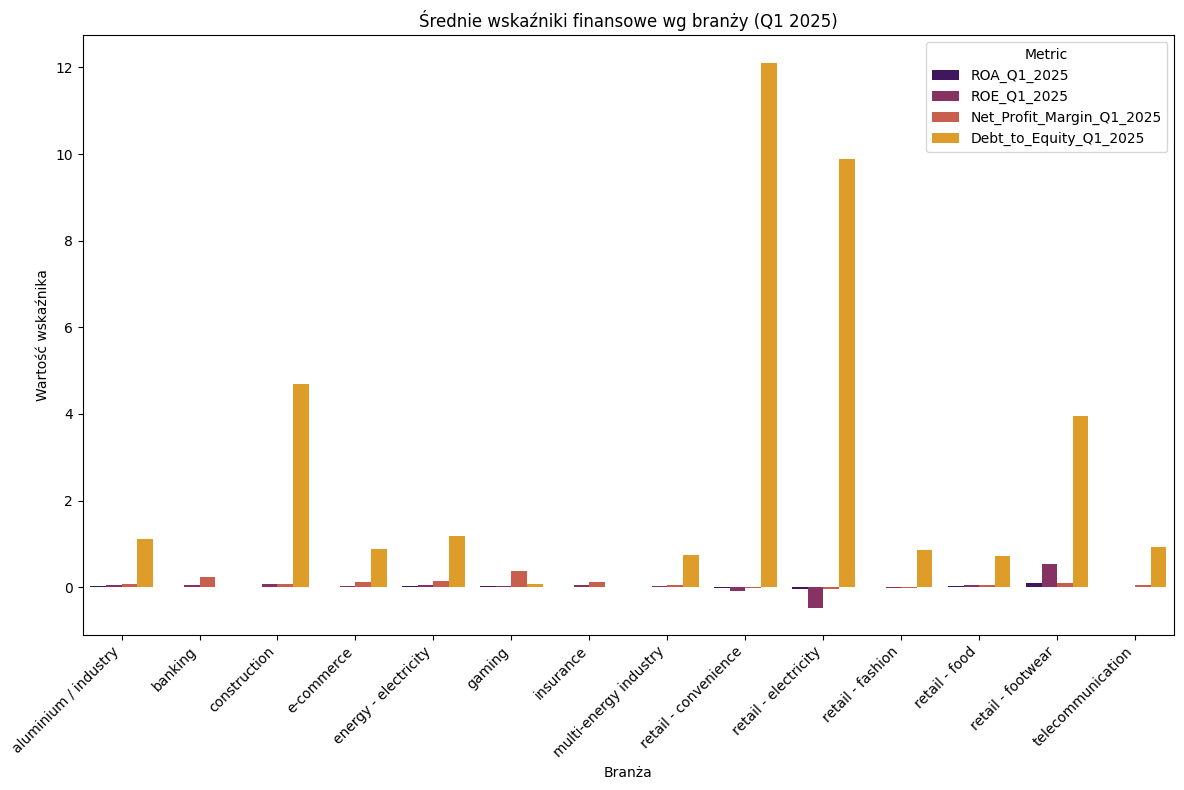

In [58]:
#average financial indicators by industry // śrendie wskaźniki finansowe wg branż
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grupowanie i obliczanie średnich
df_grouped = df.groupby('Industry')[['ROA_Q1_2025', 'ROE_Q1_2025', 'Net_Profit_Margin_Q1_2025', 'Debt_to_Equity_Q1_2025']].mean().reset_index()

# Przekształcenie danych do formatu długiego
df_melted = df_grouped.melt(id_vars='Industry', var_name='Metric', value_name='Value')

# Wykres
plt.figure(figsize=(12,8))
sns.barplot(x='Industry', y='Value', hue='Metric', data=df_melted, palette='inferno')

plt.xticks(rotation=45, ha='right')
plt.title('Średnie wskaźniki finansowe wg branży (Q1 2025)')
plt.xlabel('Branża')
plt.ylabel('Wartość wskaźnika')
plt.tight_layout()
plt.show()


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('all_companies_wide_with_ratios.csv')
df.describe()

,Assets,Capex,Cashflow_Financing,Cashflow_Investing,Cashflow_Net,Cashflow_Operating,Current_Ratio,Debt_Service_Ratio,Depreciation,EBITDA,...,Revenue,Share_Capital,Short_Term_Liabilities,current assets,fixed assets,ROA_Q1_2025,ROE_Q1_2025,EBITDA_Margin_Q1_2025,Net_Profit_Margin_Q1_2025,Debt_to_Equity_Q1_2025
count,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,11.00000,11.000000,1.800000e+01,1.800000e+01,...,1.800000e+01,1.800000e+01,1.200000e+01,1.200000e+01,1.200000e+01,18.000000,18.000000,18.000000,18.000000,12.000000
mean,1.389089e+11,-6.736154e+08,-3.393187e+08,-8.672161e+08,-1.833835e+08,1.023151e+09,1.70000,12.424545,4.685813e+08,2.033374e+09,...,9.513825e+09,1.648491e+09,1.034577e+10,1.120774e+10,2.806590e+10,0.013111,0.032222,0.250611,0.126889,3.096333
std,1.803742e+11,1.591939e+09,1.129177e+09,2.546360e+09,5.880934e+09,6.286715e+09,1.75517,8.556014,7.698466e+08,2.586380e+09,...,1.670076e+10,4.491653e+09,1.780166e+10,2.091600e+10,5.433603e+10,0.028290,0.175279,0.145215,0.117652,3.968746
min,1.919200e+09,-6.801000e+09,-2.089880e+09,-6.786000e+09,-1.995884e+10,-1.768845e+10,0.54000,2.630000,1.530000e+07,1.840000e+07,...,2.263050e+08,5.760000e+06,2.042050e+08,1.097200e+09,8.220000e+08,-0.043000,-0.467000,0.032000,-0.045000,0.078000
25%,8.039852e+09,-5.059512e+08,-6.154618e+08,-8.077542e+08,-2.441250e+08,4.282175e+07,0.88000,4.665000,7.581900e+07,4.721445e+08,...,2.185250e+09,2.870000e+07,1.463062e+09,1.753633e+09,2.112634e+09,0.003500,0.028250,0.135750,0.058750,0.826000
50%,2.305910e+10,-1.684480e+08,-2.060000e+08,-2.294575e+08,-2.400000e+07,4.219465e+08,1.16000,11.130000,2.080000e+08,8.707190e+08,...,5.103937e+09,1.329240e+08,4.201550e+09,3.983000e+09,6.644420e+09,0.006500,0.041500,0.261000,0.102500,1.015500
75%,2.570810e+11,-4.689650e+07,-9.647750e+06,-3.736375e+07,1.173313e+09,2.773147e+09,1.54000,16.970000,5.082400e+08,2.659689e+09,...,9.442074e+09,1.192973e+09,5.789253e+09,5.435150e+09,1.629562e+10,0.021250,0.050750,0.370250,0.214250,4.136500
max,5.313550e+11,-1.020000e+07,3.109000e+09,3.372000e+09,8.723000e+09,1.574200e+10,6.80000,29.930000,3.347000e+09,1.016700e+10,...,7.353500e+10,1.918400e+10,5.954500e+10,7.366900e+10,1.869750e+11,0.106000,0.532000,0.496000,0.380000,12.112000


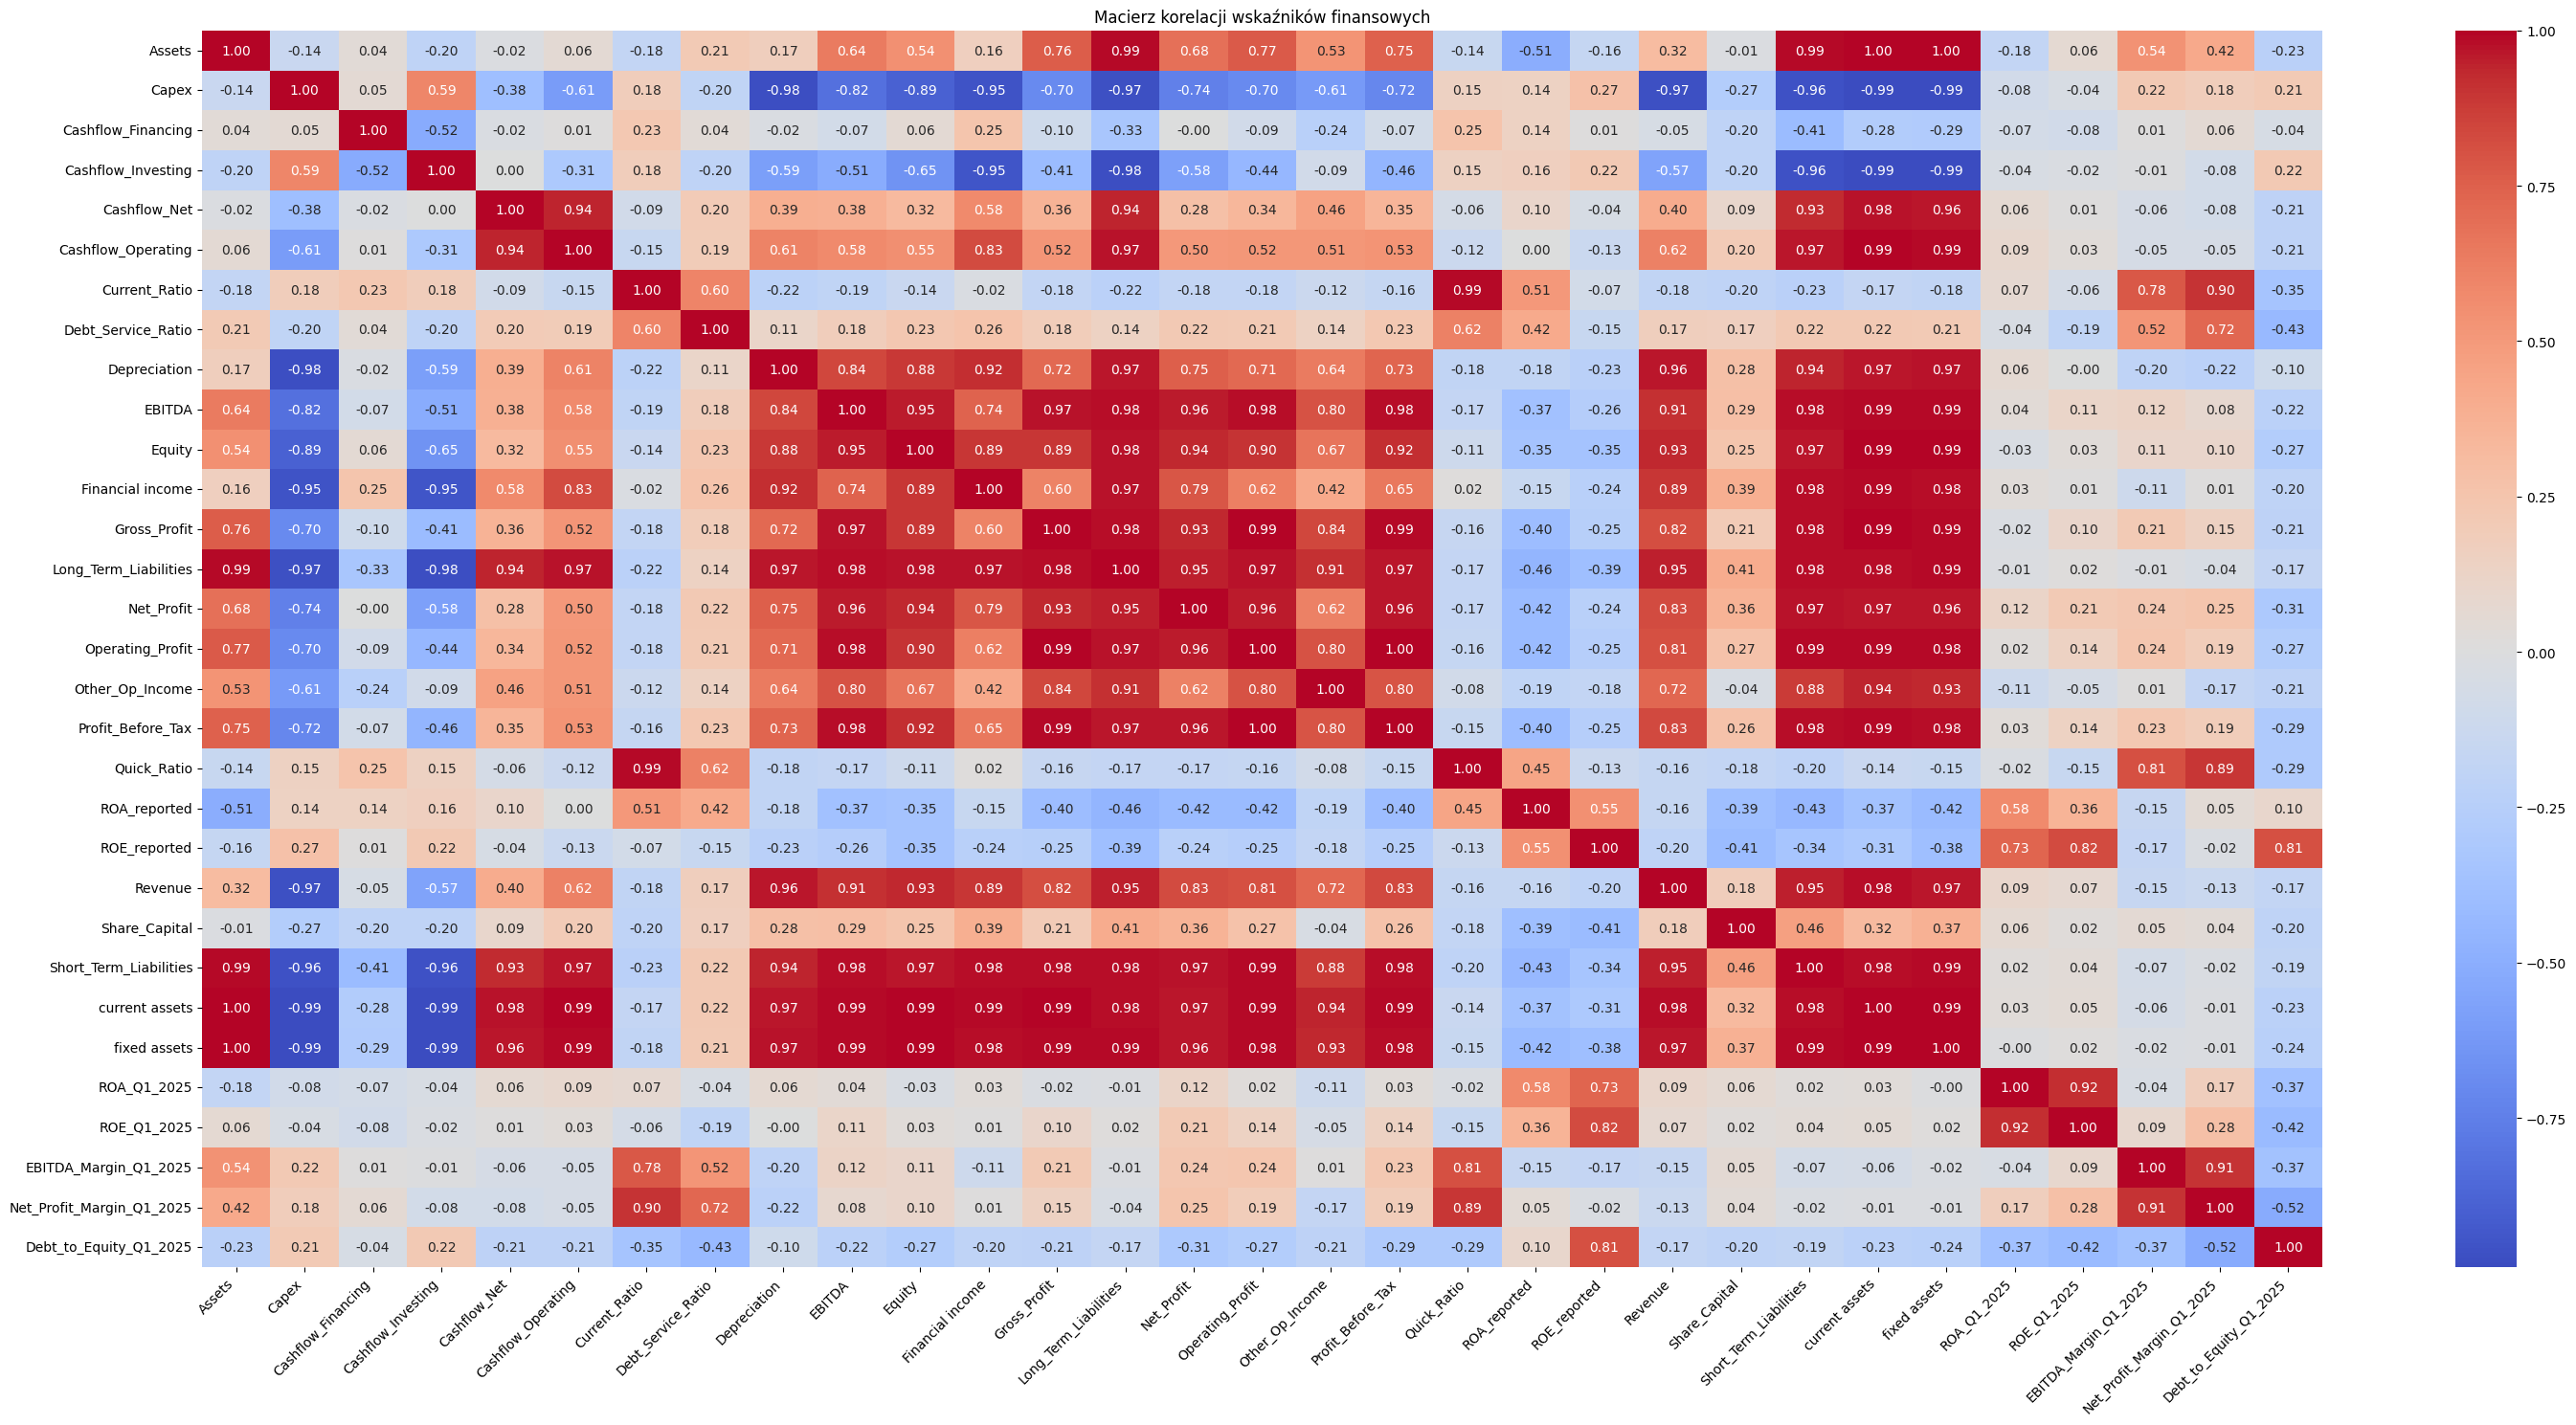

In [26]:
#CORRELATION / KORELACJA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(30,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji wskaźników finansowych")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
